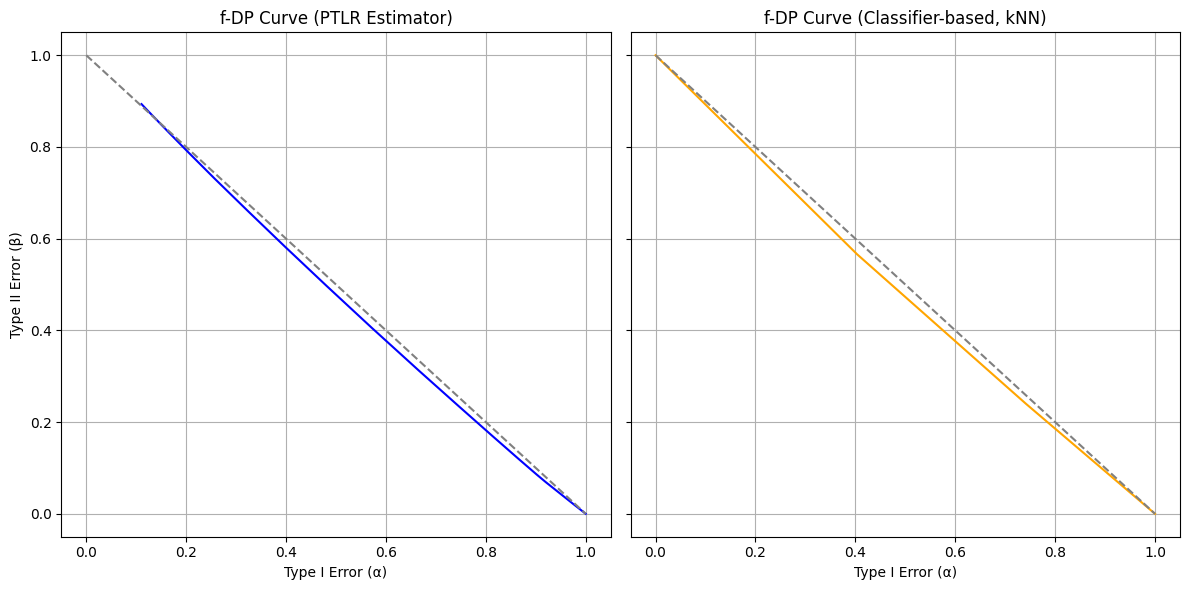

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(project_root)
sys.path.append(os.path.join(project_root, "src"))

from mech.inference_sampler import generate_params, InferencePTLREstimator, InferenceEstimator

kwargs = generate_params(
    num_samples=10000,
    num_train_samples=8000,
    num_test_samples=2000,
    m=5,
    sigma=1.0,
    h=0.1
)


est_ptlr = InferencePTLREstimator(kwargs)
est_ptlr.build(eta_max=20)
alphas_ptlr = np.array(est_ptlr.output_["alpha"])
betas_ptlr = np.array(est_ptlr.output_["beta"])

est_clf = InferenceEstimator(kwargs)
est_clf.build(eta=np.linspace(0.1, 20, 50), classifier_args={'name': 'kNN'})
alphas_clf = np.array(est_clf.output_["alpha"])
betas_clf  = np.array(est_clf.output_["beta"])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].plot(alphas_ptlr, betas_ptlr, color="blue")
axes[0].plot([0,1], [1,0], "--", color="gray")
axes[0].set_title("f-DP Curve (PTLR Estimator)")
axes[0].set_xlabel("Type I Error (α)")
axes[0].set_ylabel("Type II Error (β)")
axes[0].grid(True)

axes[1].plot(alphas_clf, betas_clf, color="orange")
axes[1].plot([0,1], [1,0], "--", color="gray")
axes[1].set_title("f-DP Curve (Classifier-based, kNN)")
axes[1].set_xlabel("Type I Error (α)")
axes[1].grid(True)

plt.tight_layout()
plt.show()